导入依赖

In [3]:
import numpy as np
import pandas as pd
import sklearn.datasets as sd
import sklearn.model_selection as sms
import matplotlib.pyplot as plt
import math
import random

In [4]:
# 读取实验数据
X, y = sd.load_svmlight_file('data/housing_scale.txt',n_features = 13)

将数据集切分为训练集和验证集

In [5]:
X_train, X_valid, y_train, y_valid = sms.train_test_split(X, y)
# 对稀疏矩阵进行类型转换
X_train = X_train.toarray()
X_valid = X_valid.toarray()
y_train = y_train.reshape(len(y_train),1)
y_valid = y_valid.reshape(len(y_valid),1)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((379, 13), (127, 13), (379, 1), (127, 1))

In [6]:
# 线性模型参数初始化，可以考虑全零初始化，随机初始化或者正态分布初始化。
theta = np.zeros((14, 1))

定义loss函数

In [7]:
# 选取一个Loss函数，计算训练集的Loss函数值，记为loss
def compute_loss(X, y, theta):
    hx = X.dot(theta)
    error = np.power((hx - y), 2).mean() / 2
    return error

In [8]:
#插入一列全为1的表示b（为x添加偏移量）
X_train = np.concatenate((np.ones((X_train.shape[0],1)), X_train), axis = 1)
X_valid = np.concatenate((np.ones((X_valid.shape[0],1)), X_valid), axis = 1)
X_train.shape, X_valid.shape

((379, 14), (127, 14))

In [9]:
# 查看当前训练集的loss
loss = compute_loss(X_train, y_train, theta)
loss


290.3913192612137

定义梯度函数和下降函数

In [10]:
#定义梯度函数
def gradient(X, y, theta):
    return X.T.dot(X.dot(theta) - y)

In [11]:
#定义下降函数
def descent(X, y, theta, alpha, iters, X_valid, y_valid):
    loss_train = np.zeros((iters,1))
    loss_valid = np.zeros((iters,1))
    for i in range(iters):
        grad = gradient(X, y, theta)
        theta = theta - alpha * grad
        loss_train[i] = compute_loss(X, y, theta)
        loss_valid[i] = compute_loss(X_valid, y_valid, theta)
    return theta, loss_train, loss_valid

In [15]:
# 梯度下降
theta = np.zeros((14,1))
alpha = 0.001
iters = 8
opt_theta, loss_train, loss_valid = descent(X_train, y_train, theta, alpha, iters, X_valid, y_valid)
loss_train.min(), loss_valid.min()

(32.87629125429709, 45.348259487870116)

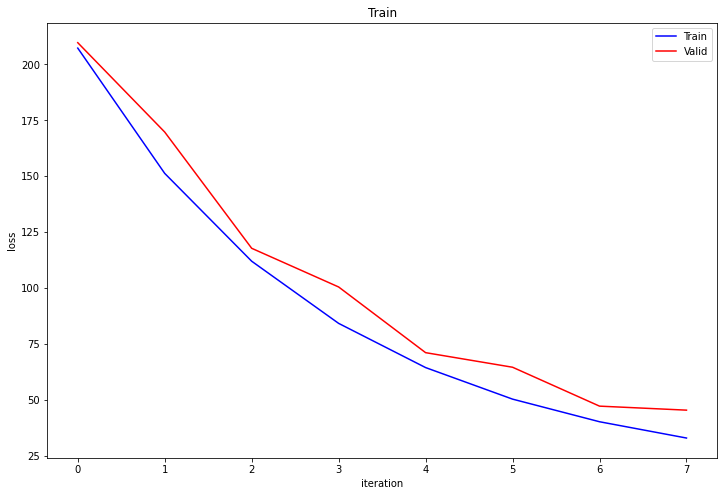

In [17]:
iteration = np.arange(0, iters, step = 1)
fig, ax = plt.subplots(figsize = (12,8))
ax.set_title('Train')
ax.set_xlabel('iteration')
ax.set_ylabel('loss')
plt.plot(iteration, loss_train, 'b', label='Train')
plt.plot(iteration, loss_valid, 'r', label='Valid')
plt.legend()
plt.show()